<a href="https://colab.research.google.com/github/akki0894/Advanced-Data-Analytics/blob/main/DNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Loading the libraries
import numpy as np
# numpy stands for numerical python
import pandas as pd
# pandas stands for panel data
import matplotlib.pyplot as plt
# Matlab plot library

In [2]:
# read the data file
dataset = pd.read_csv("Churn_Modelling.csv")
# Check if the data is properly loaded
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Our Y variable is Exited. The X's are CreditScore, Geography, Gender, Age, Tenure, Balance, NumofProducts, HasCrCard, IsActiveMember, Estimated Salary.

The business believes that these X's impact the outcome Y. There are three more columns which are redundant from an analysis perspective name rownumber, surname, customer ID.

Gender and Geography are categorical variables which have not been encoded. HasCrCard and IsActiveMember also appear to be categorical variables but have been encoded.

Our next step will be to remove the redundant columns from the data which are rownumber, surname and customer ID.

In [3]:
# The iloc function allows us to locate the row and columns from where we want to pick-up the data
X = dataset.iloc[:,3:13].values
type(X)

numpy.ndarray

Split the X's and Y's so that we can make a model where we input the X's and get the Y. That is the next step for us.

In [4]:
# We have selected the column 13, Exited as the y variable for all the rows
# We selected all the rows because we have used :
# To make things work on python we have to convert the panel data into numpy array
y = dataset.iloc[:,13].values
type(y)
y

array([1, 0, 1, ..., 1, 1, 0])

We have to convert the next categorical data that is Geography and Gender into numerical data. We will do using the LabelEncoder and OneHotEncoder which is in sklearn. For this we will import the relevant files. 

In [5]:
# Importing the relevant libraries from sklearn  processing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Pass on functionality of the library LabelEncoder to another variable
# Which is easier to use as we proceed
labelencoder = LabelEncoder()
# Now we have to do the labelencoding for gender
# The function fit_transform() fits the labelencoder function on the selected coulmn
# In this case it happens to be gender
# Labelencoder will convert male/female to 1 and 0
# No need for one hot encoding since gender is binary
X[:,2] = labelencoder.fit_transform(X[:,2])
X
# Next step is to label encode the geography 
X[:,1] = labelencoder.fit_transform(X[:,1])
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

To do onehotencoding it was easier in the olden days. Now we have to use a new fumction created by developers called COlumn Transformer. This function is a tuple and have arguments ColumnTransformer (name, object, column number). We implement it in the following manner.

In [6]:
# Get the library from sklearn.compose
from sklearn.compose import ColumnTransformer
# OneHot Encoder has been applied to column 1
# I have given the ColumnTransformer function a name of my choice which is country
# The functionality has been passed onto the variable ct but still not applied on the data
ct = ColumnTransformer([("Country", OneHotEncoder(),[1])], remainder = 'passthrough')
# We shall now apply it on the data
X = ct.fit_transform(X)
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

Look at the first 3 columns of the dataset. That is your onehot encoded numbers pertaining to Spain, Germany and France. 
Question - The Geography was located in the 2nd column of the panel data. So why is it now reflected in the beginning of the dataset?

Convert the data into a dataframe for each of understanding. Replace the countries with X1, X2 and X3 the values we have after one-hot encoding. The countries have been replaced by X1, X2 and X3 which is a vector. 
Example: France is now 1,0,0 
Spain has been replaced by 0,0,1

In [7]:
# Call the pandas dataframe command to convert the data into a frame which can be used further
# Note you are converting data type from Numpy array to Pandas
X = pd.DataFrame(X, columns = ["X1", "X2", "X3", "Credit Score", "Gender", "Age", "Tenure", "Balance", "NumofProducts", "HasCrCard", "IsActive Member", "Estimated Salary"])
X

,X1,X2,X3,Credit Score,Gender,Age,Tenure,Balance,NumofProducts,HasCrCard,IsActive Member,Estimated Salary
0,1,0,0,619,0,42,2,0,1,1,1,101349
1,0,0,1,608,0,41,1,83807.9,1,0,1,112543
2,1,0,0,502,0,42,8,159661,3,1,0,113932
3,1,0,0,699,0,39,1,0,2,0,0,93826.6
4,0,0,1,850,0,43,2,125511,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,771,1,39,5,0,2,1,0,96270.6
9996,1,0,0,516,1,35,10,57369.6,1,1,1,101700
9997,1,0,0,709,0,36,7,0,1,0,1,42085.6
9998,0,1,0,772,1,42,3,75075.3,2,1,0,92888.5


We want to avoid the dummy variable trap associated with Country Variables X1, X2 and X3. We eliminate one of the variables that is X1.

Note - We could have chosen X2 or X3 to eliminate also.

In [8]:
# From the dataframe drop X1
# axis = 1 indicates where should Python look for the variable X1
# The answer is that it should look for X1 along the X-axis and hence axis is set to 1
# If looking along the Y-axis the axis should be set to 0
X = X.drop ("X1", axis = 1)
X

,X2,X3,Credit Score,Gender,Age,Tenure,Balance,NumofProducts,HasCrCard,IsActive Member,Estimated Salary
0,0,0,619,0,42,2,0,1,1,1,101349
1,0,1,608,0,41,1,83807.9,1,0,1,112543
2,0,0,502,0,42,8,159661,3,1,0,113932
3,0,0,699,0,39,1,0,2,0,0,93826.6
4,0,1,850,0,43,2,125511,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,771,1,39,5,0,2,1,0,96270.6
9996,0,0,516,1,35,10,57369.6,1,1,1,101700
9997,0,0,709,0,36,7,0,1,0,1,42085.6
9998,1,0,772,1,42,3,75075.3,2,1,0,92888.5


We have to split the data into training and test data. We have determined that the size is 20% and the remianing data.

In [9]:
# Splitting the dataset into the Training set and Test set
# The train_test_split library function is located in sklearn.model_selection
from sklearn.model_selection import train_test_split
# To ensure that we have same data under Training and Testing
# We have to set random_state and make sure we all have the same value
# In this case it is 0
# What is random state? It is like the SEED that we use in Excel
# It ensures that everyone in the class has the same set of data records in Train and in Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
# Feature Scaling
# To standardize the data get the StandardScaler function from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
# Pass on the functinality to a new variable called sc
sc = StandardScaler()
# Standardize the data
# fit_transform is being done on the Xtrain data
# Model is learning the mean and variance from the train data and applying on test data
# After learning it is implementing it aka transform  
X_train = sc.fit_transform(X_train) 
# Model is using the mean and variance of the train data and applying on test data
# So no need to fit but only transform
X_test = sc.transform(X_test) 

In [11]:
# Importing the Keras libraries and packages
import keras

In [12]:
# Sequential because the model has all layers in a sequence
from keras.models import Sequential
# Dense implies hidden layers which we cannot access from outside
# These are built in keras function
from keras.layers import Dense

In [13]:
# Initialising the Deep Learning Model
classifier = Sequential()
# Adding the input layer
# Input_dimensions = 11
# The first hidden layer has 6 units, weights are taken randomly from a unifrom distribution and activation is ReLu
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
# Here the activation function is Sigmoid as it is a binary classification problem
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
# Compiling the DNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)


Epoch 1/100
800/800 [==============================] - 2s 1ms/step - loss: 0.4883 - accuracy: 0.7979
Epoch 2/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4197 - accuracy: 0.8183
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4054 - accuracy: 0.8279
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3929 - accuracy: 0.8285
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3840 - accuracy: 0.8310
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3772 - accuracy: 0.8405
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3726 - accuracy: 0.8454
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3677 - accuracy: 0.8497
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3640 - accuracy: 0.8487
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3607 - accura

In [14]:
# Computation of Accuracy directly

from sklearn import metrics
y_pred = classifier.predict(X_test)
i = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
accuracy = []
for cutoff in i:
  y_pred = (classifier.predict(X_test) > cutoff) # compare each element of the array with
  accuracy.append(metrics.accuracy_score(y_test, y_pred))

accuracy

[0.511,
 0.663,
 0.752,
 0.8015,
 0.8345,
 0.8505,
 0.8555,
 0.863,
 0.8635,
 0.864,
 0.863,
 0.8625,
 0.855,
 0.849,
 0.841,
 0.835,
 0.8275,
 0.8185,
 0.8135]

Accuracy: 0.864


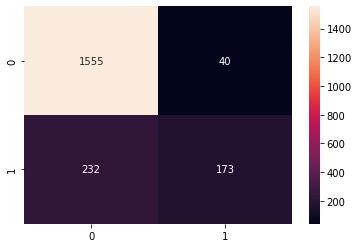

In [15]:
import seaborn as sns
from sklearn import metrics
# Predicting the test set results
# Determine if the value is less than or more than the cut-off value
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='');

Model predicts 

In [16]:
# New Customer
# Geography: France (0,0) 
# Credit Score: 600
# Gender: Male(1)
# Age: 40 years old
# Tenure: 3 years
# Balance: $60000
# Number of Products: 2
# Does this customer have a credit card ? Yes (1)
# Is this customer an Active Member: Yes (1)
# Estimated Salary: $50000
# Predict the class of this customer
# It is not straight forward 
# The brackets for a numpy array in Python is ([])
# So why are we using ([[]]) this?
# We need to transpose the data from horizontal to vertical
# In alignment with the input nodes
# This raw data has to be scaled before it can be fitted into the model
# Apply sc.transform
new_customer = classifier.predict(sc.transform(np.array([[0,0,600,1,40,3,60000,2,1,1,50000]])))
# You will get a probability value for new customer
new_prediction = (new_customer>0.5)
new_prediction


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[False]])

In [17]:
# Evaluating the DNN
# Load all the relevant libraries
# The new ones are mentioned cross_val_scores
# KerasClassifier

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

# Essentially you are copying and pasting the code/network architecture from the earlier parts of the code
# Make an user defined empty function
# This function is called build_classifier
# Make sure you keep the : and don't delete the indentation before the return 

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

# once the classifier has been created the batch size and epoch
# The user defined function "build_classifier" becomes an argument to the KerasClassifier

classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
# Computation of accuracy scores
# The estimator used is the classifier, data and cross validation is 10
# n_jobs is a python indicator to say if you are using GPU or ot for processing
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = 1)
# Get the mean of accuracy and the variance of accuracy
mean = accuracies.mean()
variance = accuracies.std()
# When 720 batches of data go through the model once it is 1 epoch
# When 720 batches of data go through the model 100 times it is 100 epochs
# This is one Cross Validation. Accuracy scores are computed.
# The second cross validation begins after the 100 epochs are over
# Once again 720 batches of data go through the model 100 times to complete 100 epochs
# This is second Cross Validaton. Accuracy scores are computed.
# This process repeats - how many times? 10 times because cv = 10 as per the code


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  app.launch_new_instance()


Epoch 1/100
720/720 [==============================] - 2s 2ms/step - loss: 0.4829 - accuracy: 0.7969
Epoch 2/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4286 - accuracy: 0.7971
Epoch 3/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4241 - accuracy: 0.7971
Epoch 4/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4203 - accuracy: 0.8103
Epoch 5/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4175 - accuracy: 0.8235
Epoch 6/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4156 - accuracy: 0.8254
Epoch 7/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4141 - accuracy: 0.8274
Epoch 8/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4117 - accuracy: 0.8313
Epoch 9/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4108 - accuracy: 0.8319
Epoch 10/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4100 - accura